In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [22]:
# Parameters
grid_size = 50  # Size of the grid
blue_ratio = 0.45 # 45% Blue
red_ratio = 0.45 # # 45% red
empty_ratio = 0.10 # 10% empty
iterations = 500  # Number of simulation steps


In [23]:
def create_grid(size):
    total = size * size
    blues = int(total * blue_ratio)
    reds = int(total * red_ratio)
    empties = total - blues - reds
    
    # Create an array with specified proportions
    elements = np.array(['B'] * blues + ['R'] * reds + ['E'] * empties)
    
    # Use np.random.permutation to shuffle the array
    shuffled_elements = np.random.permutation(elements)
    
    # Reshape into a grid
    return shuffled_elements.reshape(size, size)



In [24]:
def cell_happy(grid, x, y):
    current = grid[x][y]
    if current == 'E':
        return True
    
    nearby = find_neighbors(grid, x, y)
    similar = sum(1 for nx, ny in nearby if grid[nx][ny] == current)
    return similar >= 2


In [25]:
def find_neighbors(grid, x, y):
    offsets = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    neighbors = []
    for dx, dy in offsets:
        nx, ny = x + dx, y + dy
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
            neighbors.append((nx, ny))
    return neighbors


In [26]:
def relocate(grid):
    unhappy = [(i, j) for i in range(grid.shape[0]) for j in range(grid.shape[1]) if not cell_happy(grid, i, j)]
    if not unhappy:
        return False
    
    ux, uy = random.choice(unhappy)
    empties = [(i, j) for i in range(grid.shape[0]) for j in range(grid.shape[1]) if grid[i][j] == 'E']
    ex, ey = random.choice(empties)
    
    grid[ex][ey] = grid[ux][uy]
    grid[ux][uy] = 'E'
    return True


In [28]:
def simulate(grid_size, iterations):
    grid = create_grid(grid_size)
    for iter in range(iterations):
        relocate(grid)
        if iter + 1 in [1, 50, 100, 200, 300, 400, 500]:
            plt.imshow(grid == 'B', cmap='Blues', alpha=0.5)
            plt.imshow(grid == 'R', cmap='Reds', alpha=0.5)
            plt.title(f'Iteration {iter + 1}')
            plt.axis('off')
            plt.show()


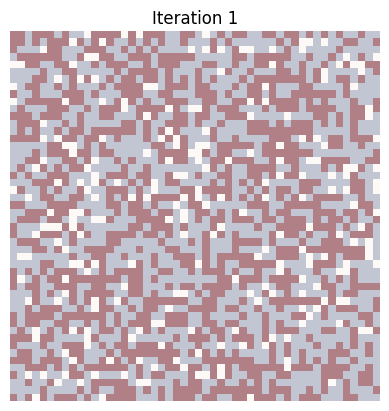

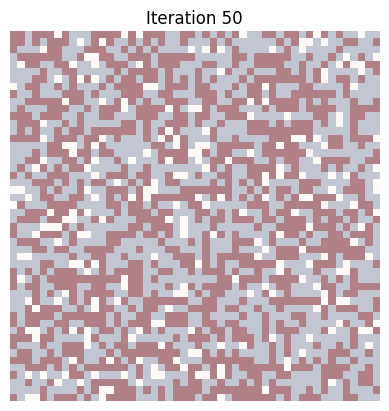

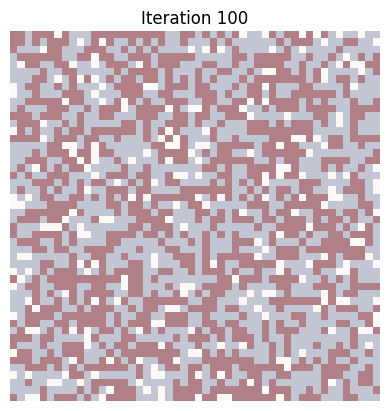

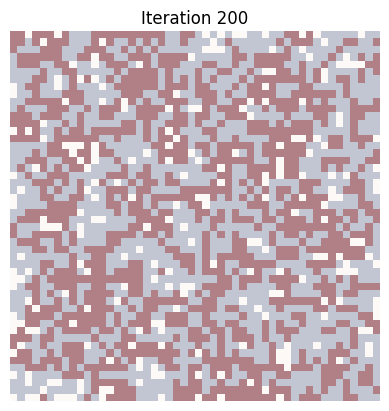

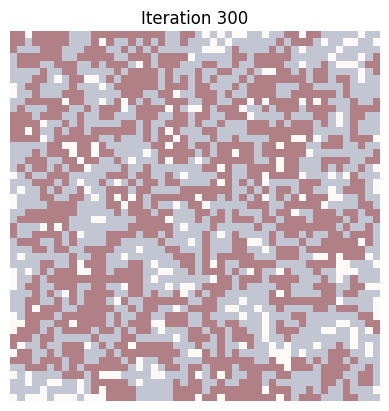

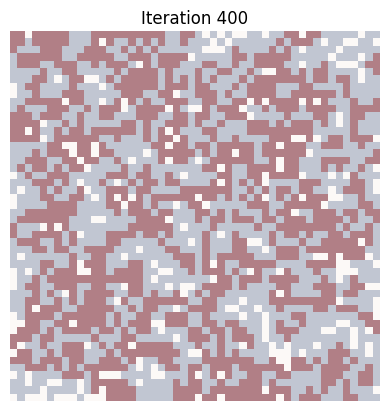

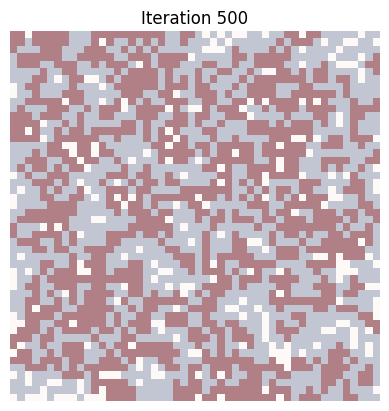

In [29]:
# Execute the simulation
simulate(grid_size, iterations)
